In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
params_df = pd.read_excel("C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\pso_results\\pso_full.xlsx")

In [3]:
def excelListCleanup(inputDfRow):
    toClean = inputDfRow
    toRemove=['[',']','\n'] 
    for i in toRemove:
        toClean = toClean.replace(i,'')
    toClean = toClean.split(' ')
    toClean = [i for i in toClean if i!='']
    toClean = [float(i)for i in toClean]
    #print(toClean)
    return toClean
#params_df.iat[65, params_df.columns.get_loc('costVal_list')]
#print(excelListCleanup(params_df.iat[65, params_df.columns.get_loc('costVal_list')]))

In [4]:
params_df.costVal_list = params_df.costVal_list.apply(lambda x : excelListCleanup(x))
params_df.feasibility_list = params_df.feasibility_list.apply(lambda x : excelListCleanup(x))
params_df.lastHit_list = params_df.lastHit_list.apply(lambda x : excelListCleanup(x))

In [5]:
params_df

,nb_r,N,expID_list,costVal_list,feasibility_list,lastHit_list,costVal_mean,feasibility_mean,lastHit_mean,costVal_median,...,lastHit_median,costVal_std,feasibility_std,lastHit_std,costVal_min,feasibility_min,lastHit_min,costVal_max,feasibility_max,lastHit_max
0,0,50,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 1...,"[462.90037498, 437.25992474, 429.02653792, 425...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[4747.0, 174776.0, 90025.0, 46214.0, 6681.0, 4...",433.413111,1,106608.76,432.035678,...,90262,13.881304,0,61096.385354,406.458291,1,4747,466.066884,1,179045
1,0,100,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 1...,"[406.6498058, 429.73971131, 411.79394128, 413....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[110127.0, 112503.0, 104769.0, 187912.0, 62624...",425.656518,1,109297.40,424.942921,...,104769,12.289021,0,57654.132204,406.649806,1,28962,456.491945,1,199905
2,0,200,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 1...,"[437.45037348, 387.12523572, 420.2813669, 423....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[88216.0, 160203.0, 77603.0, 53007.0, 50044.0,...",421.929134,1,85945.56,423.887200,...,84060,15.200282,0,42531.585006,387.125236,1,23803,451.772748,1,168243
3,5,50,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 1...,"[424.69457872, 416.94439971, 436.47834749, 415...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[56393.0, 97693.0, 189492.0, 116070.0, 48609.0...",425.763775,1,114112.00,428.101784,...,103317,12.192127,0,54120.795883,396.304405,1,10661,441.646804,1,199999
4,5,100,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 1...,"[426.92575457, 411.1258458, 444.84749115, 418....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[166748.0, 61967.0, 63233.0, 116953.0, 162515....",423.121611,1,117209.76,422.542661,...,116953,11.935331,0,43496.262609,402.408151,1,57515,444.847491,1,196062
5,5,200,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 1...,"[402.59315409, 415.16761516, 427.70926795, 386...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[194944.0, 108177.0, 141968.0, 197003.0, 14520...",410.326940,1,154642.12,413.673383,...,159847,13.828622,0,35023.542621,366.565460,1,77412,429.634918,1,199996


### Cost Values Boxplot 

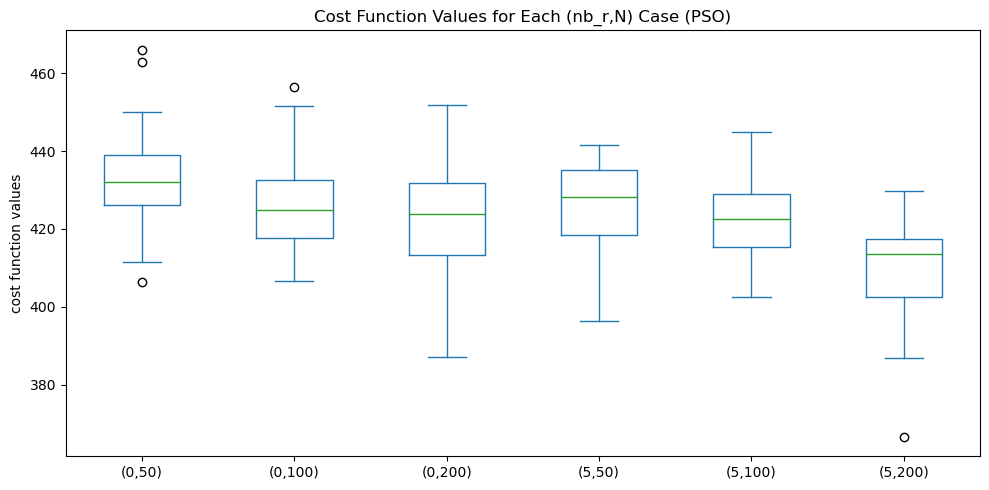

In [6]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for f in range(1):
    #temp_df= params_df[(params_df['nb_r'] == nb_r[f])]
    data=[]
    titles=[]
    temp_df = params_df.copy()
    for i in range(6):
        data.append(temp_df.iat[i, temp_df.columns.get_loc('costVal_list')])
        #print(temp_df.iat[i, temp_df.columns.get_loc('costVal_list')])
        titles.append('nb_r:'+str(temp_df.iat[i, temp_df.columns.get_loc('nb_r')])+' N:'+str(temp_df.iat[i, temp_df.columns.get_loc('N')]))

    #print(temp_df)
    #print(data)
    # Pandas dataframe
    dataDf = pd.DataFrame({'(0,50)': data[0],'(0,100)': data[1],'(0,200)': data[2],'(5,50)': data[3],'(5,100)': data[4],'(5,200)': data[5]})

    # Plot the dataframe
    ax = dataDf[['(0,50)','(0,100)','(0,200)','(5,50)','(5,100)','(5,200)']].plot(kind='box', title='Cost Function Values for Each (nb_r,N) Case (PSO)')
    ax.set_ylabel('cost function values')
    # Name And Save the plot
    plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\pso_results\\pso_boxplots\\'+'pso_cv_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')

### Feasibility Boxplot 

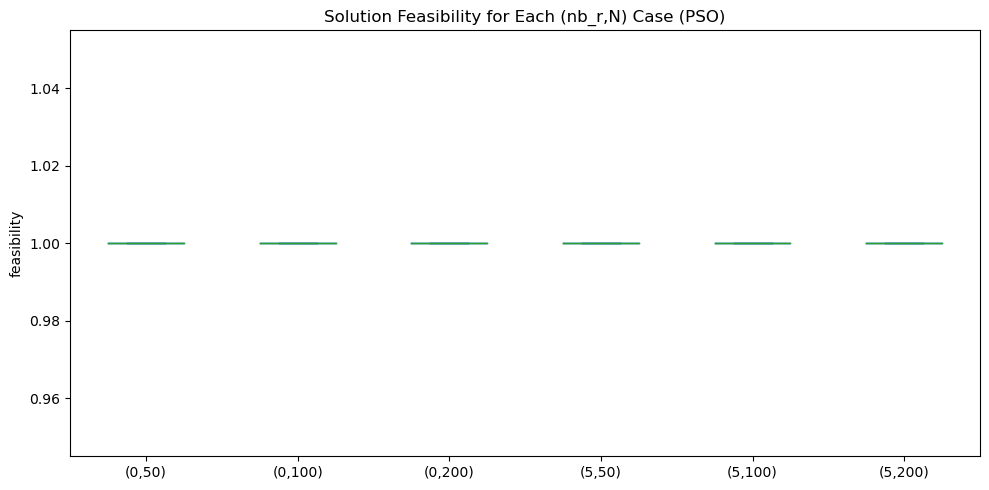

In [7]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for f in range(1):
    #temp_df= params_df[(params_df['nb_r'] == nb_r[f])]
    data=[]
    titles=[]
    temp_df = params_df.copy()
    for i in range(6):
        data.append(temp_df.iat[i, temp_df.columns.get_loc('feasibility_list')])
        titles.append('nb_r:'+str(temp_df.iat[i, temp_df.columns.get_loc('nb_r')])+' N:'+str(temp_df.iat[i, temp_df.columns.get_loc('N')]))

    #print(temp_df)
    #print(data)
    # Pandas dataframe
    dataDf = pd.DataFrame({'(0,50)': data[0],'(0,100)': data[1],'(0,200)': data[2],'(5,50)': data[3],'(5,100)': data[4],'(5,200)': data[5]})

    # Plot the dataframe
    ax = dataDf[['(0,50)','(0,100)','(0,200)','(5,50)','(5,100)','(5,200)']].plot(kind='box', title='Solution Feasibility for Each (nb_r,N) Case (PSO)')
    ax.set_ylabel('feasibility')
    # Name And Save the plot
    plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\pso_results\\pso_boxplots\\'+'pso_f_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')

### Last Hit Box Plot  

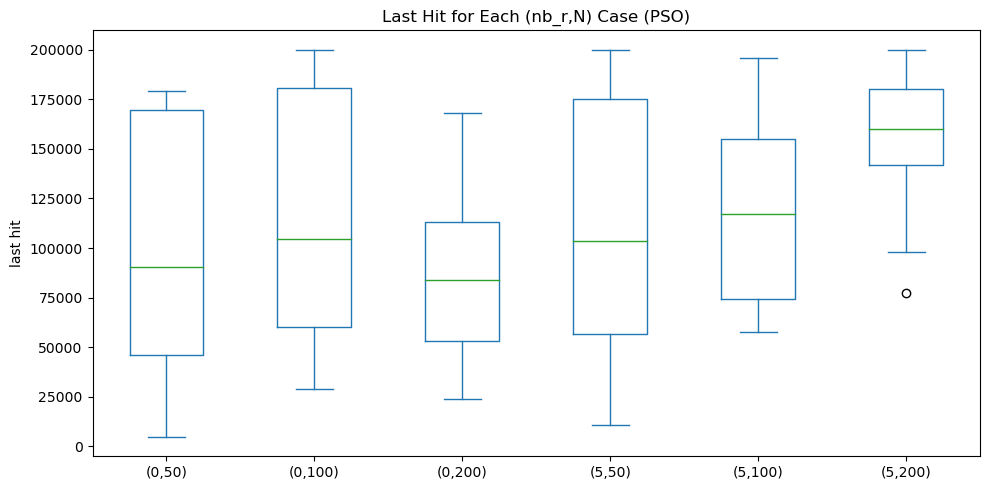

In [8]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for f in range(1):
    #temp_df= params_df[(params_df['nb_r'] == nb_r[f])]
    data=[]
    titles=[]
    temp_df = params_df.copy()
    for i in range(6):
        data.append(temp_df.iat[i, temp_df.columns.get_loc('lastHit_list')])
        titles.append('nb_r:'+str(temp_df.iat[i, temp_df.columns.get_loc('nb_r')])+' N:'+str(temp_df.iat[i, temp_df.columns.get_loc('N')]))

    #print(temp_df)
    #print(data)
    # Pandas dataframe
    dataDf = pd.DataFrame({'(0,50)': data[0],'(0,100)': data[1],'(0,200)': data[2],'(5,50)': data[3],'(5,100)': data[4],'(5,200)': data[5]})

    # Plot the dataframe
    ax = dataDf[['(0,50)','(0,100)','(0,200)','(5,50)','(5,100)','(5,200)']].plot(kind='box', title='Last Hit for Each (nb_r,N) Case (PSO)')
    ax.set_ylabel('last hit')
    # Name And Save the plot
    plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\pso_results\\pso_boxplots\\'+'pso_lh_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')